
###  **Rolling Mean – Summary in Simple Words**

- **Primary use**:  **Visual smoothing**.
- **Why?** Raw time series can be noisy and spiky — hard to interpret.
- **Rolling mean** helps:
  -  **Reveal trends** more clearly
  -  **Spot seasonality** when combined with rolling std or decomposition
  -  **Identify anomalies** (if a point deviates from the smoothed average)

---


In [1]:
import pandas as pd

# Small dataset
data = [10, 12, 14, 16, 18, 20]
df = pd.DataFrame({'Value': data})

# Apply rolling mean with window size of 3
df['Rolling_Mean_3'] = df['Value'].rolling(window=3).mean()

# Display the result
display(df)


   Value  Rolling_Mean_3
0     10             NaN
1     12             NaN
2     14            12.0
3     16            14.0
4     18            16.0
5     20            18.0


##Key Takeaways:
* Window size 3 means: for each row, use current + previous 2 rows.

* First window-1 values will always be NaN, since there's not enough data to compute the mean.

* You can adjust the window size based on how much smoothing or trend detection you want.



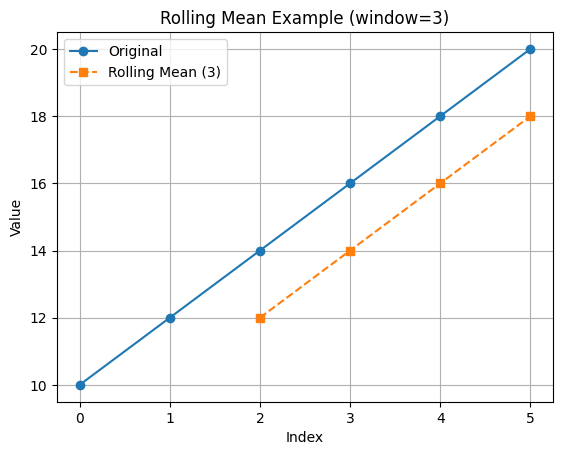

In [2]:
import matplotlib.pyplot as plt

plt.plot(df['Value'], marker='o', label='Original')
plt.plot(df['Rolling_Mean_3'], marker='s', label='Rolling Mean (3)', linestyle='--')
plt.title('Rolling Mean Example (window=3)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


##Let's explore 3 diverse time series examples where rolling mean adds real value. I’ll show:

* Stock Prices – Trend detection

* Daily Temperature – Seasonality smoothing

* Website Traffic – Weekend spikes and trend visibility

Each example uses real-ish or typical patterns and highlights why a rolling mean is insightful.

##Example 1: Stock Prices (Financial Data)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


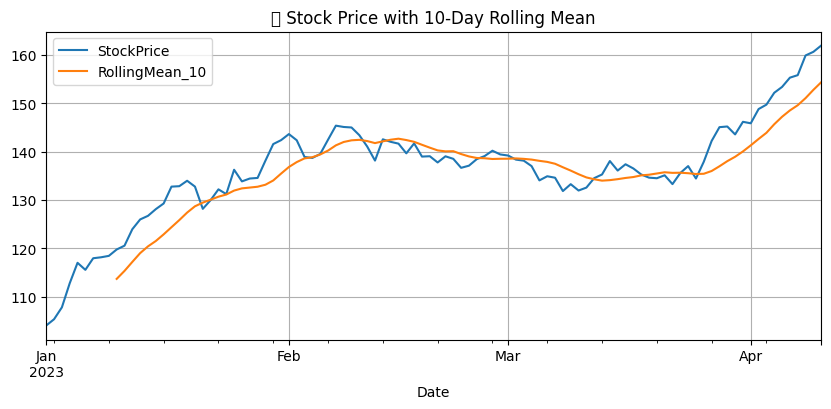

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulated stock price with noise
np.random.seed(0)
days = pd.date_range(start="2023-01-01", periods=100)
prices = np.cumsum(np.random.normal(0.5, 2, size=100)) + 100  # upward trend with noise

df1 = pd.DataFrame({'Date': days, 'StockPrice': prices}).set_index('Date')
df1['RollingMean_10'] = df1['StockPrice'].rolling(window=10).mean()

# Plot
df1.plot(title="📈 Stock Price with 10-Day Rolling Mean", figsize=(10, 4))
plt.grid()
plt.show()


##Insight: Raw prices are noisy — the rolling mean shows an upward trend more clearly.



##Example 2: Daily Temperature (Seasonal Pattern)



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


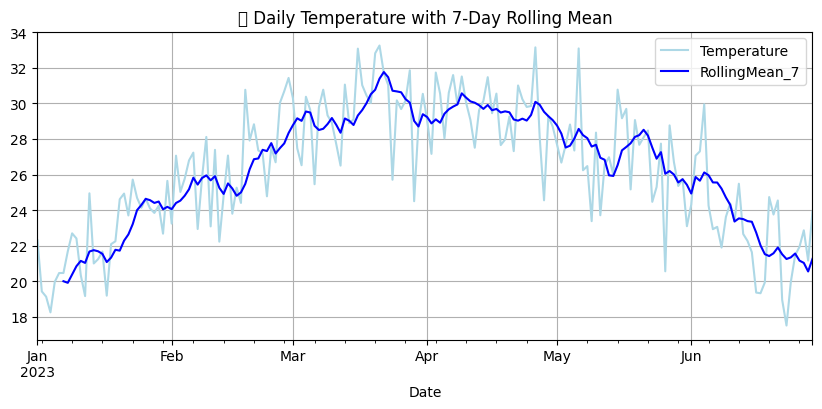

In [6]:
# Simulate daily temp with seasonality
days = pd.date_range(start="2023-01-01", periods=180)
temp = 20 + 10 * np.sin(2 * np.pi * days.dayofyear / 365) + np.random.normal(0, 2, size=180)

df2 = pd.DataFrame({'Date': days, 'Temperature': temp}).set_index('Date')
df2['RollingMean_7'] = df2['Temperature'].rolling(window=7).mean()

# Plot
df2.plot(title="🌡️ Daily Temperature with 7-Day Rolling Mean", figsize=(10, 4), color=["lightblue", "blue"])
plt.grid()
plt.show()


##Insight: Seasonal changes (weekly ups and downs) are smoothed, revealing the sinusoidal yearly pattern.

##Example 3: Website Traffic (Business Use Case)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


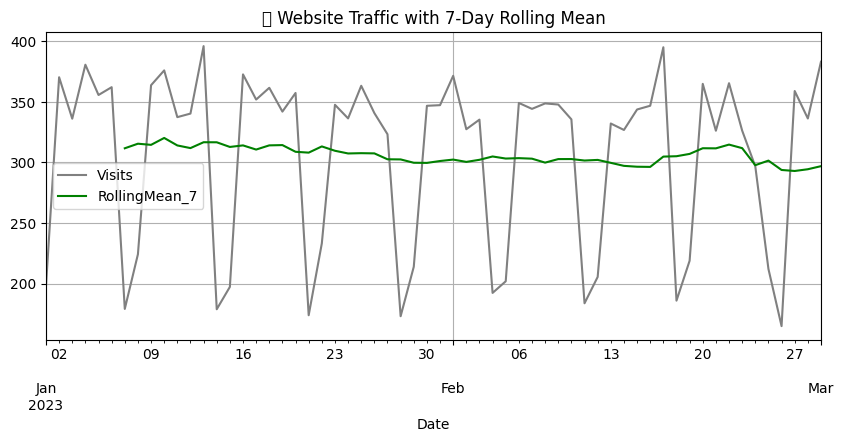

In [5]:
# Simulate web traffic with weekday/weekend effects
days = pd.date_range(start="2023-01-01", periods=60)
visits = [300 + 50 * (1 if d.weekday() < 5 else -2) + np.random.normal(0, 20) for d in days]

df3 = pd.DataFrame({'Date': days, 'Visits': visits}).set_index('Date')
df3['RollingMean_7'] = df3['Visits'].rolling(window=7).mean()

# Plot
df3.plot(title="📉 Website Traffic with 7-Day Rolling Mean", figsize=(10, 4), color=["gray", "green"])
plt.grid()
plt.show()


##Insight: Sharp drops on weekends are smoothed out — helps you focus on long-term growth or decline.

